In [15]:
from os import listdir
from os.path import isfile, join
from Bio import SeqIO

heavy_path = "../../datasets/raw/Heavy_variable_dog_unique_functional.fasta"
kappa_path = "../../datasets/raw/Light_variable_kappa_dog_unique_functional.fasta"
lambda_path = "../../datasets/raw/Light_variable_lambda_dog_unique_functional.fasta"

i = 0
records = []
seqs = []
with open(heavy_path) as handle:
    j = 0
    for record in SeqIO.parse(handle, "fasta"):
        records.append(record)
        seqs.append(str(record.seq))
        # break
        i+=1
        j+=1
    print(j)
with open(kappa_path) as handle:
    j = 0
    for record in SeqIO.parse(handle, "fasta"):
        records.append(record)
        seqs.append(str(record.seq))
        # break
        i+=1
        j+=1
    print(j)
with open(lambda_path) as handle:
    j = 0
    for record in SeqIO.parse(handle, "fasta"):
        records.append(record)
        seqs.append(str(record.seq))
        # break
        i+=1
        j+=1
    print(j)
print(len(seqs))
print(len(set(seqs)))

272535
79545
81881
433961
433915


# Check if CDR - FR pairs are unique

In [1]:
import pandas as pd

# Read all ft_input files
train_ft_input_path = '../../datasets/doggy_data/train_ft_input'
val_ft_input_path = '../../datasets/doggy_data/val_ft_input'
test_ft_input_path = '../../datasets/doggy_data/test_ft_input'

train_ft_output_path = '../../datasets/doggy_data/train_ft_output'
val_ft_output_path = '../../datasets/doggy_data/val_ft_output'
test_ft_output_path = '../../datasets/doggy_data/test_ft_output'

seqs = []

with open(train_ft_input_path, "r") as handle:
    for seq in handle.readlines():
        seqs.append(seq.replace('\r\n', ""))
with open(val_ft_input_path, "r") as handle:
    for seq in handle.readlines():
        seqs.append(seq.replace('\r\n', ""))
with open(val_ft_input_path, "r") as handle:
    for seq in handle.readlines():
        seqs.append(seq.replace('\r\n', ""))
print(len(seqs))

print(len(set(seqs)))

425283
255800


# Alignment tests

In [16]:
from Bio import Align
from Bio.pairwise2 import format_alignment
from Bio.SeqUtils import ProtParam
from Bio.Align import substitution_matrices
import random

random.seed(1234)

train_pt_path = '../../datasets/doggy_data/train_pt'

seqs = []

with open(train_pt_path, "r") as handle:
    for seq in handle.readlines():
        seqs.append(seq.replace('\n', "").replace("<heavy>", "").replace("<light_kappa>", "").replace("<light_lambda>", ""))

# i_1 = random.randint(0, len(seqs))
# i_2 = random.randint(0, len(seqs))

i_1 = 1
i_2 = 1

print(i_1)
print(i_2)

print(seqs[i_1])
print(seqs[i_2])

aligner = Align.PairwiseAligner()
aligner.mode = 'local'
aligner.open_gap_score = -11
aligner.extend_gap_score = -1
aligner.substitution_matrix = substitution_matrices.load(name='PAM30')
alignment = aligner.align(seqs[i_1], seqs[i_2])

print(ProtParam.ProteinAnalysis(seqs[i_1]).charge_at_pH(7))
print(ProtParam.ProteinAnalysis(seqs[i_1]).gravy())
print(ProtParam.ProteinAnalysis(seqs[i_1]).instability_index())
print(ProtParam.ProteinAnalysis(seqs[i_1]).molecular_weight())

print(alignment[0].score)

# print(format_alignment(*alignment[0], full_sequences=True))

1
1
EVQLVESGGDQVKPAGSLRLSCVASGFTFSSYDMSWVRQAPGKGLQWVAGINSGGSITGYADAVKGRFTISRDNARNTVYLQMNSLRAEDTAMYYCAKPPRYSDFWGQGTLVTVSS
EVQLVESGGDQVKPAGSLRLSCVASGFTFSSYDMSWVRQAPGKGLQWVAGINSGGSITGYADAVKGRFTISRDNARNTVYLQMNSLRAEDTAMYYCAKPPRYSDFWGQGTLVTVSS
1.8193111187954436
-0.25689655172413794
35.170689655172396
12543.89649999999
870.0


In [13]:
from Bio import Align
from Bio.pairwise2 import format_alignment
from Bio.SeqUtils import ProtParam
from Bio.Align import substitution_matrices
import random
from tqdm import tqdm

random.seed(1234)

val_pt_path = '../../datasets/doggy_data/val_pt'

seqs = []

aligner = Align.PairwiseAligner()
aligner.mode = 'local'
aligner.open_gap_score = -11
aligner.extend_gap_score = -1
aligner.substitution_matrix = substitution_matrices.load(name='PAM30')

i = 0
sum_score = 0

with open(val_pt_path, "r") as handle:
    handle.readline()
    for seq in tqdm(handle.readlines()):
        seq = seq.replace('\n', "").replace("<heavy>", "").replace("<light_kappa>", "").replace("<light_lambda>", "")
        alignment = aligner.align(seq, seq)
        i += 1
        sum_score += alignment[0].score

print(sum_score/i)

100%|██████████| 42528/42528 [00:07<00:00, 5367.12it/s]

866.4464588036118


XML parsing tests

In [11]:
from Bio import Align
from Bio.pairwise2 import format_alignment
from Bio.SeqUtils import ProtParam
from Bio.Align import substitution_matrices
import re

shit_output = "<extra_id_1><extra_id_2> G<extra_id_3> A<extra_id_4> GGGGTA<extra_id_5> TVTVTVSSS</s></s></s></s></s></s></s></s></s></s> S</s> SSSSSS</s> GTVSSSS</s> TVSSS</s></s></s> S</s><extra_id_5> SSSSSS</s> S</s> TVS</s> TVSSSS</s></s></s></s> S</s> GQGQL</s> GTVSSS</s></s></s></s></s></s></s></s></s> S</s> SSSS</s> S</s> GGTVSSSS</s></s></s></s> S</s></s></s></s></s></s></s></s></s> G<extra_id_1> GGGG<extra_id_4>GTLQWG"
output = "<extra_id_0> KYSMNWVR<extra_id_1> IGN<extra_id_2> Y<extra_id_3> AVN<extra_id_4> GT<extra_id_5> S</s><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk>"
input = "<s> <heavy>EGQLAESGGDLVKPAGSLRLSCVASGLAFN<extra_id_0> QAPEKGLQLVAG<extra_id_1> AGSRT<extra_id_2> YADAVKGRFTISRDS<extra_id_3> TVFLQMNSLTAEDTAVYYCAKVATDFRGPGAAYGLEYWGQ<extra_id_4> LVTVS<extra_id_5><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk>"

extra_id_template = "<extra_id_?>"
extra_id_len = len(extra_id_template)

def strip_tags(sequence):
    sequence = re.sub("<[^>]+>", "", sequence)
    return sequence.replace(" ", "")

def reconstruct_pt_sequence(sequence, generated ):
    sequence = sequence.replace(" ", "")
    generated = generated.replace(" ", "")
    i = 0
    reconstructed = sequence
    while True:
        # Find next id in input
        extra_id = extra_id_template.replace("?", str(i))
        
        idx = sequence.find(extra_id)

        # Check if extra id exsits
        if idx == -1:
            return strip_tags(reconstructed)

        # Find extra id in generated
        start_idx = generated.find(extra_id)
        # If extra id is not found, skip (i.e. replace with "")
        if start_idx == -1:
            i += 1
            continue
        generated = generated[start_idx+extra_id_len:]
        end_idx = generated.find("<")
        if start_idx == -1:
            end_idx = len(generated)-1

        chunk = generated[:end_idx]
        reconstructed = reconstructed.replace(extra_id, chunk)

        i += 1

print(input)
print(shit_output)
original = reconstruct_pt_sequence(input, output)
generated = reconstruct_pt_sequence(input, shit_output)


aligner = Align.PairwiseAligner()
aligner.mode = 'local'
aligner.open_gap_score = -11
aligner.extend_gap_score = -1
aligner.substitution_matrix = substitution_matrices.load(name='PAM30')

alignment = aligner.align(original, generated)
print(alignment[0])

<s> <heavy>EGQLAESGGDLVKPAGSLRLSCVASGLAFN<extra_id_0> QAPEKGLQLVAG<extra_id_1> AGSRT<extra_id_2> YADAVKGRFTISRDS<extra_id_3> TVFLQMNSLTAEDTAVYYCAKVATDFRGPGAAYGLEYWGQ<extra_id_4> LVTVS<extra_id_5><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk>
<extra_id_1><extra_id_2> G<extra_id_3> A<extra_id_4> GGGGTA<extra_id_5> TVTVTVSSS</s></s></s></s></s></s></s></s></s></s> S</s> SSSSSS</s> GTVSSSS</s> TVSSS</s></s></s> S</s><extra_id_5> SSSSSS</s> S</s> TVS</s> TVSSSS</s></s></s></s> S</s> GQGQL</s> GTVSSS</s></s></s></s></s></s></s></s></s> S</s> SSSS</s> S</s> GGTVSSSS</s></s></s></s> S</s></s></s></s></s></s></s></s></s> G<extra_id_1> GGGG<extra_id_4>GTLQWG
target            0 EGQLAESGGDLVKPAGSLRLSCVASGLAFNKYSMNWVRQAPEKGLQLVAGIGNAGSRTYY
                  0 ||||||||||||||||||||||||||||||--------||||||||||||---|||||.|
query             0 EGQLAESGGDLVKPAGSLRLSCVASGLAFN-------

In [3]:
from Bio import Align
from Bio.pairwise2 import format_alignment
from Bio.SeqUtils import ProtParam
from Bio.Align import substitution_matrices
import re

# original = "EVQLVESGGDLVKPGGSLRLSCVASGFSFSSCNMGWVRQAPGKGLQWVAWIKTRGSDTSYADAVKGRFTISRDDAKNTLYLQMNSLREEDTAMYYCVRAVNGWYEVHNYDYWGQGTLVTVSS"
# new = "EGQLAESGGDLVKPGGSLRLSCVASGFSFSSCNMSWVRQSPGKGLQWVADIKTRGSDTYYADAVKGRFTISRDNAKNTLYLQMNSLRAEDTAVYYCVRAVNGWYEVHNYDYWGQGTLVTVSS" 

# original = "GVQLAESGGDLVKPGGSLRLSCVASGLILSSIGMTWVRQSPGKELQWVADLASSGNTYYTDAVKGRFTISRDNAKNTLYLQMDSLRAEDTAVYFCTTGRRGYWGQGTLVTVSS"
# new = "EGQLAESGGDLVKPGGSLRLSCVASGLILSSIGMSWVRQSPGKGLQWVADLASSGNTYYADAVKGRFTISRDNAKNTLYLQMNSLRAEDTAVYYCTTGRRGYWGQGTLVTVSS" 

# original = "IVMTQTPLSLSVSPGETASISCKANSNGNTYLVWYRQKPGQSPQRLINLVSNRDPGVPDRFSGSGSGTDFTLRISRVEADDAGVYYCGQGIQVPVTFGQGTKLEIK"
# new = "WVRQAESGGDLVKPAGSLRLSCVASSNGNTYMDWVRQAPGKGLQWVASLVYYADAVKGRFTISRDNAKNTLYLQMNSLRAEDTAVYYCGQGIQVPVTWGQGTLVTVSS" 

original = "EGQLAESGGDLVKPAGSLRLSCVASGFTFSIYSMSWVRQAPEKGLQLVAGIDSGGRNTYYTDAVKGRFTISRDNAKNTVYLQMNSLRAEDTAMYYCAKDLVATDGGEYWGQGTLVTVSS"
new = "EGQLAESGGDLVKPAGSLRLSCVASGFTFSIYSMSWVRQAPGKGLQLVAGIDSGGRNTYYTDAVKGRFTISRDNAKNTVYLQMNSLRAEDTAMYYCAKDLVATDGGEYWGQGTLVTVSS" 

aligner = Align.PairwiseAligner()
aligner.mode = 'global'
aligner.open_gap_score = -11
aligner.extend_gap_score = -1
aligner.substitution_matrix = substitution_matrices.load(name='PAM30')

alignment = aligner.align(original, new)
print(alignment[0])
print(alignment.score)

EGQLAESGGDLVKPAGSLRLSCVASGFTFSIYSMSWVRQAPEKGLQLVAGIDSGGRNTYYTDAVKGRFTISRDNAKNTVYLQMNSLRAEDTAMYYCAKDLVATDGGEYWGQGTLVTVSS
|||||||||||||||||||||||||||||||||||||||||.|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
EGQLAESGGDLVKPAGSLRLSCVASGFTFSIYSMSWVRQAPGKGLQLVAGIDSGGRNTYYTDAVKGRFTISRDNAKNTVYLQMNSLRAEDTAMYYCAKDLVATDGGEYWGQGTLVTVSS

873.0


In [1]:
import torch
import torchaudio

print(torch.__version__)
print(torchaudio.__version__)

from torchaudio.models.decoder import CTCDecoderLM, CTCDecoderLMState
import torch

CTCDecoderLM.__init__(self)

2.3.0
2.3.0


TypeError: __init__(self, ...) called with invalid or missing `self` argument

In [14]:
import os
from os.path import isfile, join
import gzip
import pandas as pd
from tqdm import tqdm
import shutil
import re

data_dir = '../../datasets/doggy_data/train_pt'
pattern = r'<[^>]+>'

with open(data_dir, "r") as handle:
    line = handle.readline()
    line = handle.readline()
    line = re.sub(pattern, '', line).strip()
    i = 0
    longest = len(line)
    while line:
        line = handle.readline()
        line = re.sub(pattern, '', line).strip()
        if len(line) < longest and len(line) != 0 :
            longest = len(line)

print(i)
print(longest)

0
85


In [4]:
import os
from os.path import isfile, join
import gzip
import pandas as pd
from tqdm import tqdm
import shutil
import re

train_data_dir = '../../datasets/doggy_data/train_pt'
test_data_dir = '../../datasets/doggy_data/test_pt'
val_data_dir = '../../datasets/doggy_data/val_pt'
pattern = r'<[^>]+>'

i = 0
j = 0
heavy_count = 0
light_kappa_count = 0
light_lambda_count = 0

for data_dir in [train_data_dir, test_data_dir, val_data_dir]:
    with open(data_dir, "r") as handle:
        handle.readline()  # Skip the first line
        for line in handle:
            j += 1
            if "<heavy>" in line:
                heavy_count += 1
            if "<light_kappa>" in line:
                light_kappa_count += 1
            if "<light_lambda>" in line:
                light_lambda_count += 1

print("Total lines:", j)
print("Heavy count:", heavy_count)
print("Light kappa count:", light_kappa_count)
print("Light lambda count:", light_lambda_count)
print("Heavy ratio:", heavy_count / j)
print("Light kappa ratio:", light_kappa_count / j)
print("Light lambda ratio:", light_lambda_count / j)

# BEGIN: Sanity check by summing the ratios
total_ratio = (heavy_count + light_kappa_count + light_lambda_count) / j
print("Total ratio (should be 1.0):", total_ratio)
# END: Sanity check by summing the ratios

Total lines: 425281
Heavy count: 270034
Light kappa count: 78833
Light lambda count: 76414
Heavy ratio: 0.6349543008034688
Light kappa ratio: 0.18536685156402471
Light lambda ratio: 0.1796788476325065
Total ratio (should be 1.0): 1.0


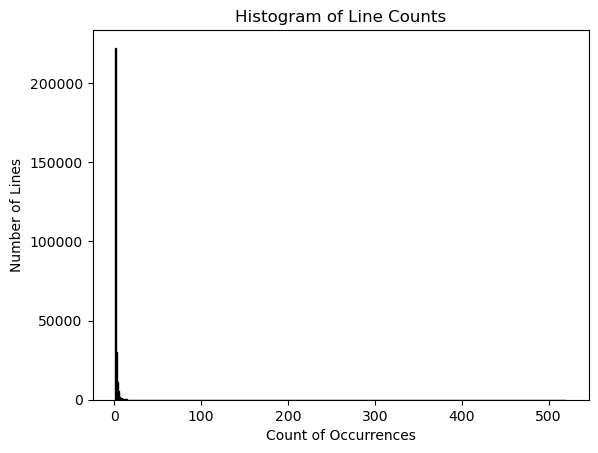

Sequence: <heavy>GFTFSSYA<sep>INSGATST<sep>AKEDRGGHTYGNGPEY, Count: 520
Sequence: <heavy>GFSLDSAG<sep>IDYDGGT<sep>ARAELKA, Count: 352
Sequence: <light_kappa>QSLLRSDGKSY<sep>EA<sep>QQSLHFPPT, Count: 297
Sequence: <light_kappa>QSLLHSNGNTY<sep>LV<sep>GQGTQLPYT, Count: 212
Sequence: <heavy>GFTFSIYD<sep>INYDGSIT<sep>TQRSSWYYPIH, Count: 207
    Count  Frequency
99    520          1
98    352          1
97    297          1
96    212          1
73    207          1
..    ...        ...
4       5       3131
3       4       5579
2       3      11346
1       2      29835
0       1     222336

[100 rows x 2 columns]


In [10]:
train_data_dir = '../../datasets/doggy_data/train_ft_input'
test_data_dir = '../../datasets/doggy_data/test_ft_input'
val_data_dir = '../../datasets/doggy_data/val_ft_input'

from collections import defaultdict
import pandas as pd

line_counts = defaultdict(int)

for data_dir in [train_data_dir, test_data_dir, val_data_dir]:
    with open(data_dir, "r") as handle:
        handle.readline()  # Skip the first line
        for line in handle:
            line = line.strip()
            line_counts[line] += 1

import matplotlib.pyplot as plt

# Extract counts
counts = list(line_counts.values())

# Plot histogram
plt.hist(counts, bins=range(1, max(counts) + 1), edgecolor='black')
plt.xlabel('Count of Occurrences')
plt.ylabel('Number of Lines')
plt.title('Histogram of Line Counts')
plt.show()

# Display counts as a table, sorted from high to low
counts_df = pd.DataFrame(counts, columns=['Count']).value_counts().reset_index(name='Frequency').sort_values(by='Count', ascending=False)
# Print the top 5 entries with sequences
top_5_sequences = counts_df.head(5)
for index, row in top_5_sequences.iterrows():
    sequence = list(line_counts.keys())[list(line_counts.values()).index(row['Count'])]
    print(f"Sequence: {sequence}, Count: {row['Count']}")
print(counts_df)


In [1]:
train_data_dir = '../../datasets/doggy_data/train_pt'
test_data_dir = '../../datasets/doggy_data/test_pt'
val_data_dir = '../../datasets/doggy_data/val_pt'

from collections import defaultdict

line_counts = defaultdict(int)

for data_dir in [train_data_dir, test_data_dir, val_data_dir]:
    with open(data_dir, "r") as handle:
        handle.readline()  # Skip the first line
        for line in handle:
            line = line.strip()
            line_counts[line] += 1

duplicates = {line: count for line, count in line_counts.items() if count > 1}

print(f"Number of duplicate entries: {len(duplicates)}")
for line, count in duplicates.items():
    print(f"Sequence: {line}, Count: {count}")

Number of duplicate entries: 40
Sequence: <heavy>DALVESGGDLARPGGSLRLSCVASGFTFSSYHMSWVRQAPGKGLQWVAYINSGGSSISNADAVKGRFTISRDNAKNTVYLQMNSLRAEDTAVYYCAIRPSYGSSDFDYWGQGTLVTVSS, Count: 2
Sequence: <heavy>DGQLAESGGDLVKPAGSLRLSCVASGFTFNNYDMTWVRQAPGKGLQWVAGINSGGSRTTYADAVKGRFTISRDNAKNTLYLQMNSLRAEDTAVYYCVRGGHLGYWGQGTLVTVSS, Count: 2
Sequence: <heavy>DGQLAESGGDLVRPGGSLRLSCVASGFTLSGYNMLWVRQAPGKGLQWVAFINSGGSITTYADAVKGRFTVSRDNAKNTLYLQMNSLRVEDTAVYFCEDHSGGRRWGQGTLVTVSS, Count: 2
Sequence: <heavy>EAQLVESGGDLVKPGGSLRLSCVASGFPFYSYDMDWVRLAPGKGLQWVSEISTSGSDTFYADDVKGRFTVSRDNGKNTLYLQMSSLRVEDTAVYYCARWGTTGKGFWGQGTLVTVSS, Count: 2
Sequence: <heavy>DGQLAESGGDLVIPGGSLRLSCVASGFTFSDYSMQWVRQAPGKGLQWVAHISSDGTNTYYADAVEGRFTVSRDNAKNTAYLQMNSLRAEDTAVYYCVPAPNSSGWRDLQYWGQGTLVTVSS, Count: 2
Sequence: <heavy>DGQLAESGGDLVKPGGSLRLSCVASGFTLSSYDMNWVRQAPGKGLQWLSEISISGSNTYYADAVKGRFTISRDSAKNTLYLQMNSLRAEDTAVYYCTNRRYDRSFEYWGQGTLVTVSS, Count: 2
Sequence: <heavy>AVELVESGGDLVKPGGSLRLSCVASGFIFDYSDMTWIDRASLQWVADISKDGRSITYADAVKGRFTLSRDNGRNTVFL

In [2]:
template = "<heavy>GFTFSSYA<sep>INSGATST<sep>AKEDRGGHTYGNGPEY"

output_lines = []

train_input_data_dir = '../../datasets/doggy_data/train_ft_input'
train_output_data_dir = '../../datasets/doggy_data/train_ft_output'
indices = []
with open(train_input_data_dir, "r") as input_handle:
    for idx, line in enumerate(input_handle):
        if template in line:
            indices.append(idx)
with open(train_output_data_dir, "r") as output_handle:
    for idx, line in enumerate(output_handle):
        if idx in indices:
            output_lines.append(line.strip())

test_input_data_dir = '../../datasets/doggy_data/test_ft_input'
test_output_data_dir = '../../datasets/doggy_data/test_ft_output'
with open(test_input_data_dir, "r") as input_handle:
    for idx, line in enumerate(input_handle):
        if template in line:
            indices.append(idx)
with open(test_output_data_dir, "r") as output_handle:
    for idx, line in enumerate(output_handle):
        if idx in indices:
            output_lines.append(line.strip())

val_input_data_dir = '../../datasets/doggy_data/val_ft_input'
val_output_data_dir = '../../datasets/doggy_data/val_ft_output'
with open(val_input_data_dir, "r") as input_handle:
    for idx, line in enumerate(input_handle):
        if template in line:
            indices.append(idx)
with open(val_output_data_dir, "r") as output_handle:
    for idx, line in enumerate(output_handle):
        if idx in indices:
            output_lines.append(line.strip())


['<heavy>GVQLAESGGDLVKPAGSLRLSCVTS<H-CDR-1>MTWVRQAPGKGLQWVAG<H-CDR-2>SYTDAVKGRFTISRDSAKNTVYLQMDSLRAEDTAVYYC<H-CDR-3>WGQGNPGHRLL', '<heavy>GVQLGESGGDLVKPGSLRLSCVTS<H-CDR-1>MTWVRQAPGKGLQWVAG<H-CDR-2>SYTDAVKGRFTISRDSAKNTVYLQMDSLRAEDTAVYYC<H-CDR-3>WGQGTLVTVSS', '<heavy>GVQLAESGGDLVKPAGSLRLSCVTS<H-CDR-1>MTWVRQAPGKGWQWVAG<H-CDR-2>SYTDAVKGRFTISRDSAKNTVYLQMDSLRAEDTAVYYC<H-CDR-3>WGQGTLVTVSS', '<heavy>GVQLAESGGDLVKPAGSLRLSCVTS<H-CDR-1>MTWVRQAPGKGLQWVAG<H-CDR-2>SYTDAVKGRFTISRDSAKNTVYLQMDSLEAEDTAVYYC<H-CDR-3>WGQGTLVTVSS', '<heavy>GVQLAESGGDLVKPAGSLRLSCVTS<H-CDR-1>MTWVRQAPGKGLQWVAG<H-CDR-2>SYTDAVKGRFTISRDSAKNTVYLQMDSLRAEDTAVYC<H-CDR-3>WAQGTLVTVSS', '<heavy>GVQLAESGGDLVKPAGSLRLSCVTS<H-CDR-1>MTWVRAPGKGLQWVAG<H-CDR-2>SYTDAVKGRFTISRDSAKNTVYLQMDSLRAEDTAVYYC<H-CDR-3>WGQGTLVTVSS', '<heavy>GVQLAESGGDLVKPAGSLRLSCVTS<H-CDR-1>MTGVRQAPGKGLQWVAG<H-CDR-2>SYTDAVKGRFTISRDSAKNTVYLQMDSLRAEDTAVYYC<H-CDR-3>WGQGTLVTVSS', '<heavy>GVQLAESGGDLVKPAGSLRLSCVTS<H-CDR-1>MTWVRQAPGKGLQWVAG<H-CDR-2>DYTDAVKGRFTISRDSAKNTVYLQMDSLRAE